## Linear Regression Demo 

#### Learning Objectives

In this lesson we'll cover: 

**EDA**
- Creating correlation column between features and target variables
- `sns.pairplot()`

**Using Linear Regression**
- Using sklearn to fit a MLR 
- Calculating MLR predictions using sklearn 
- Manually calculating MLR predictions 

**Interpreting Linear Regression Results** 
- Calculating r_squared using `.score()` and `sklearn.metrics.r2_score()`
- Calculating residuals
- Plotting true values vs. predictions
- Plotting residuals vs. predictions 




Data description
---
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

#### Load in the dataframe and take a look at the columns - what are we working with here?

In [2]:
## Load the dataframe 

boston = pd.read_csv('../data/boston_housing.csv')

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Lets use `df.corrwith()` to create a heatmap of correlation with our target variable    

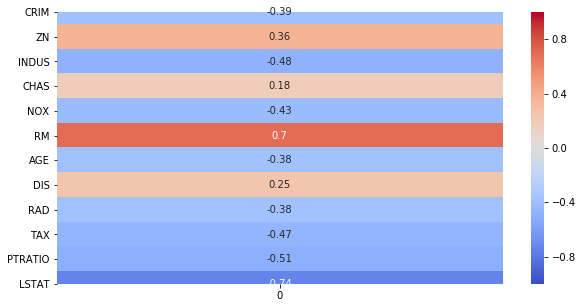

In [14]:
## code here 

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(boston.corrwith(boston['MEDV']).iloc[:-1].to_frame(), \
           cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [20]:
correlations = boston.corrwith(boston['MEDV']).iloc[:-1].to_frame()
correlations['ABS'] = correlations[0].abs()

sorted_corrs = correlations.sort_values('ABS', ascending=False)[0]

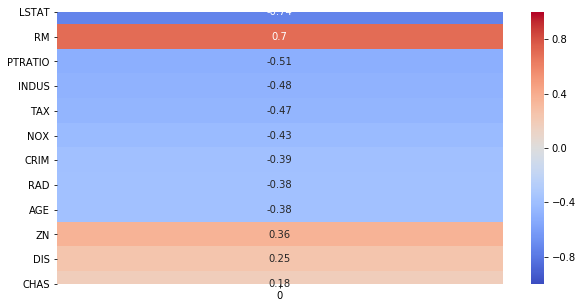

In [28]:
correlations = boston.corrwith(boston['MEDV']).iloc[:-1].to_frame()
correlations['ABS'] = correlations[0].abs()

sorted_corrs = correlations.sort_values('ABS', ascending=False)[0]

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(sorted_corrs.to_frame(), \
           cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [11]:
## Use df.corrwith()


#### Move on to a pairplot to get a high level overview of the data. 
- Let's select 4 variables, 3 `X` variables (independent variables) and one `y` or `target` - `MEDV` in this case

In [30]:
feature_names = ['LSTAT', 'RM', 'PTRATIO']

X = boston[feature_names]
y = boston['MEDV']

all_cols = pd.concat([X,y.to_frame()], axis=1)

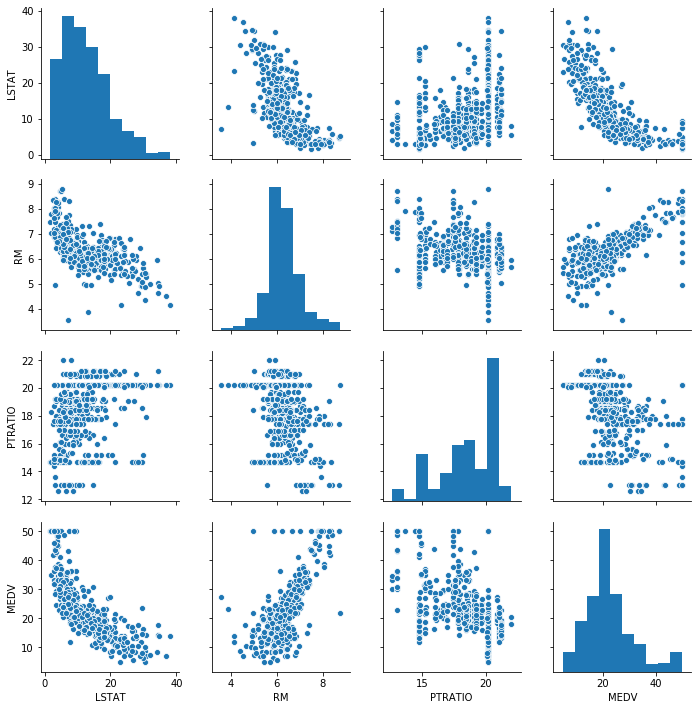

In [39]:
sns.pairplot(all_cols);

## *Enter* Sklearn! 

In [40]:
from sklearn.linear_model import LinearRegression

#### What are we doing with the below statement?  What type of object is `lr`?

In [41]:
lr = LinearRegression()

In [27]:
# use tab to pull up the different attributes and methods contained within lr
lr.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Create a list `features` which contains the strings of the column names we want to use in our model, then make a dataframe `X` containing just those features and store our target column in as a pandas series `y`

In [42]:
### What's the shape of the dataframe? 
X.shape

(506, 3)

In [43]:
y.shape

(506,)

#### Fit the model

Notice how we aren't assigning the fitted model to a new variable - instead the coefficients are being stored in the `lr` object

In [44]:
from sklearn.model_selection import train_test_split

In [53]:
## do a train test split and fit the model on the train 

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

21.972842162002667


#### Put the coeffiecients in a dataframe - do they make sense based on our initial explortation of the features? 

 

In [58]:
### looking at the coefs
pd.DataFrame(lr.coef_, index=X.columns)

,0
LSTAT,-0.597791
RM,4.013617
PTRATIO,-0.925843


In [59]:
lr.intercept_

21.972842162002667

### How would we calculate a prediction for the first neighborhood in the data set? 

In [62]:
X_train.head(1)

,LSTAT,RM,PTRATIO
214,29.55,5.412,18.6


In [64]:
X_train.head(1)

,LSTAT,RM,PTRATIO
214,29.55,5.412,18.6


In [65]:
lr.predict(X_train.head(1))

array([8.80913294])

In [66]:
y_train.head(1)

214    23.7
Name: MEDV, dtype: float64



#### Let's use sklearn and the `.predict` method in your linear regression object to come up with a prediction for the first neighborhood in the dataset

In [9]:
## What is our model's prediction for the medv home value for the first neighborhood? second neighborhood?


### Exercise 2:

Can you calculate the prediction for the first neighborhood **without** using sklearns built in `.predict` method? 








In [68]:
lr.coef_

array([-0.59779122,  4.0136168 , -0.92584262])

In [70]:
## Now  Manaully calculate this using coefficients and the values for the first neighborhood
X_train.head(1)

29.55 * lr.coef_[0] + 5.412 * lr.coef_[1] + 18.6 * lr.coef_[2] + lr.intercept_

8.80913293730028

In [74]:
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

#### Why does `.score()` take in X as an input?  



In [75]:
## What's happening under the hood with this .score method?
lr.score(X_test, y_test)

0.7282212005822981

#### Lets import `r2_score` to calculate r squared as well 

In [78]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_test, test_predictions)

0.7282212005822981

In [84]:
mean_squared_error(y_test, test_predictions)#**(1/2)

19.98046961978034

In [83]:
squared_errors = []
for true_value, prediction in zip(y_test, test_predictions):
    squared_error = (true_value - prediction) **2
    squared_errors.append(squared_error)
    
sum(squared_errors) /  len(squared_errors)

19.98046961978035

In [7]:
## Quick check - what is the shape of predictions?


In [9]:
## use the r2_score method


####  Calculate residuals by subtracting the true values from the predictions. 

`residuals = y_true - predictions`

In [87]:
## grab the residuals
residuals = y_test - test_predictions

#### Plot a histogram of the residuals 

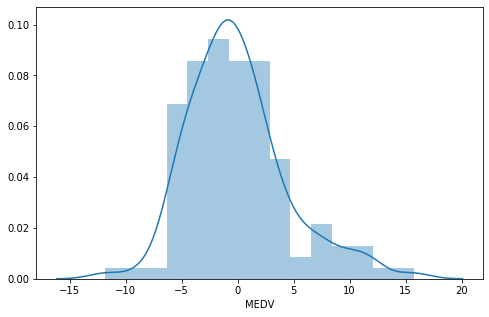

In [91]:
## Plot a histogram of the residuals 
fig , ax = plt.subplots(figsize=(8,5))

sns.distplot(residuals, ax= ax);

#### Now let's plot predictions against true values and predictions against residuals 

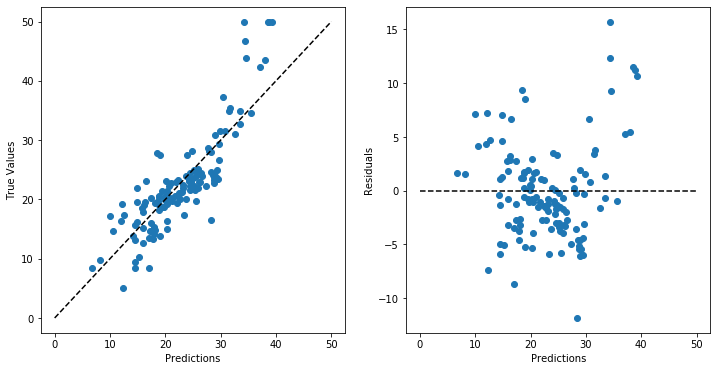

In [90]:
## Let's plot predictions against true values 
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.scatter(test_predictions, y_test)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('True Values')
ax1.plot([0,50], [0,50], linestyle='--', color='black')

ax2.scatter(test_predictions, residuals)
ax2.set_xlabel('Predictions')
ax2.set_ylabel('Residuals')
ax2.plot([0,50], [0,0], linestyle='--', color='black');

In [3]:
## Let's plot our residuals 
